In [ ]:
"""
Clase: rnn

Objetivo: modelo

Cambios:

    1. Creacion de modelo aquesada 07-07-2025
"""

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split


In [19]:
df = pd.read_csv('../../data/processed/recomendaciones.csv',encoding = "ISO-8859-1",delimiter=',')

In [20]:
df.drop(columns=["YEAR", "MONTH"], inplace=True)

In [21]:
X = df.drop('Recomendacion',axis=1).values

In [26]:
y = df['Recomendacion']

In [27]:
y = pd.get_dummies(y)

In [28]:
y = y.values

In [29]:
y

array([[ True, False, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False, False,  True]], shape=(528, 3))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [31]:
X_train.shape

(396, 5)

In [32]:
X_test.shape

(132, 5)

In [33]:
model = Sequential()
# Elegir número de capas (layers)
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
# Indicar tantas neuronas de salida como clases a predecir, en este caso 3 (variable "Interest_Rate")
num_neuronas_salida = len(df["Recomendacion"].unique())
#Capa inicial usando Input
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(units=num_neuronas, activation='relu'))
model.add(Dense(num_neuronas_salida, activation='softmax'))  # softmax para multiclase - softmax activation distribuye la probabilidad sobre cada nodo de salida (clase)

# Para clasificación multiclase "categorical_crossentropy"
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [35]:
# Entrenar el modelo
model.fit(x=X_train,
          y=y_train,
          epochs=20,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - categorical_accuracy: 0.2862 - loss: 1.3609 - val_categorical_accuracy: 0.3182 - val_loss: 1.3708
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.2784 - loss: 1.3474 - val_categorical_accuracy: 0.3182 - val_loss: 1.3604
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - categorical_accuracy: 0.2810 - loss: 1.3342 - val_categorical_accuracy: 0.3182 - val_loss: 1.3501
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - categorical_accuracy: 0.2836 - loss: 1.3248 - val_categorical_accuracy: 0.3182 - val_loss: 1.3399
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - categorical_accuracy: 0.2719 - loss: 1.3347 - val_categorical_accuracy: 0.3182 - val_loss: 1.3301
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - categorical_accuracy: 0.2745 - loss: 1.3119 - val_categorical_accuracy: 0.3182 - val_loss: 1.3205
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.2849 - loss: 1.2995 - val_cate

<Axes: >

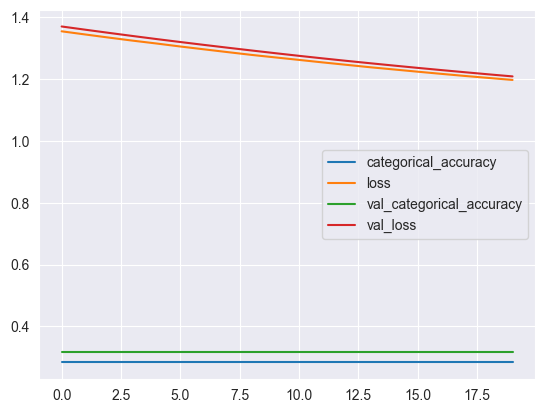

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()